# Tyler's Capstone Scratchpad

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import prepare
import explore
import tyler_explore
import tyler_wrangle
from datetime import datetime
import os

In [2]:
# df = acquire.get_survey_data('survey.csv')

In [3]:
# df.info()

In [4]:
# strings_df = prepare.prep_the_strings(df)
# strings_df.info()

In [5]:
# encode_df = prepare.prep_encode(strings_df)
# encode_df.info()

In [6]:
# testing wrangle functions...
df = tyler_wrangle.get_survey_data('survey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
strings_df = tyler_wrangle.prep_the_strings(df)
encoded_df = tyler_wrangle.prep_encode(strings_df)

In [8]:
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

In [9]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

## Data Exploration

### Boolean Variables:
- 'self_employed'
- 'family_history'
- 'remote_work'
- 'tech_company'
- 'obs_consequence'

In [10]:
# first let's split the data...

train, validate, test = explore.train_validate_test_split(encoded_df, 'work_interfere')

In [11]:
train.shape, validate.shape, test.shape

((535, 25), (230, 25), (192, 25))

In [12]:
cat_vars, quant_vars = explore.cat_vs_quant(train)

In [13]:
cat_vars

['gender',
 'self_employed',
 'family_history',
 'treatment',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [14]:
quant_vars

['age']

In [15]:
train.company_size.nunique()

6

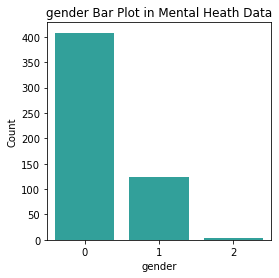

   gender  Count  Percent
0       0    408    76.26
1       1    124    23.18
2       2      3     0.56
_________________________________________________________________


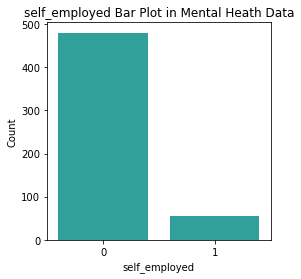

   self_employed  Count  Percent
0              0    480    89.72
1              1     55    10.28
_________________________________________________________________


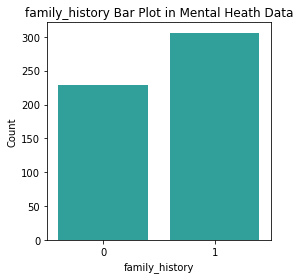

   family_history  Count  Percent
0               1    306     57.2
1               0    229     42.8
_________________________________________________________________


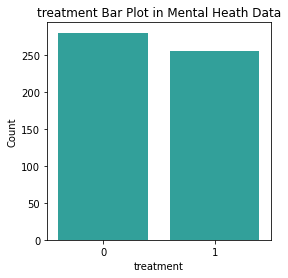

   treatment  Count  Percent
1          0    280    52.34
0          1    255    47.66
_________________________________________________________________


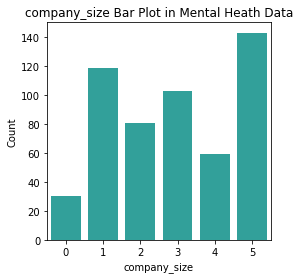

   company_size  Count  Percent
5             5    143    26.73
2             1    119    22.24
1             3    103    19.25
3             2     81    15.14
0             4     59    11.03
4             0     30     5.61
_________________________________________________________________


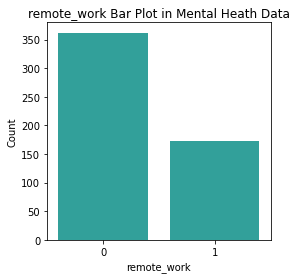

   remote_work  Count  Percent
0            0    362    67.66
1            1    173    32.34
_________________________________________________________________


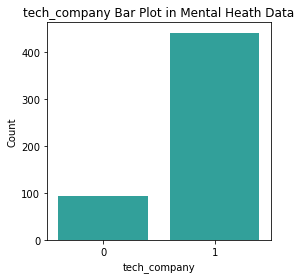

   tech_company  Count  Percent
1             1    441    82.43
0             0     94    17.57
_________________________________________________________________


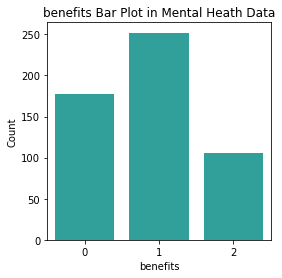

   benefits  Count  Percent
1         1    252    47.10
2         0    177    33.08
0         2    106    19.81
_________________________________________________________________


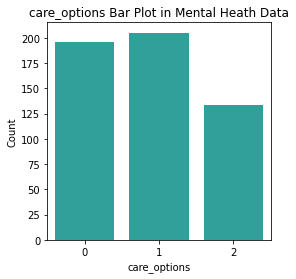

   care_options  Count  Percent
1             1    205    38.32
0             0    196    36.64
2             2    134    25.05
_________________________________________________________________


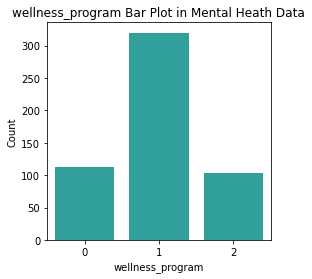

   wellness_program  Count  Percent
0                 1    320    59.81
1                 0    112    20.93
2                 2    103    19.25
_________________________________________________________________


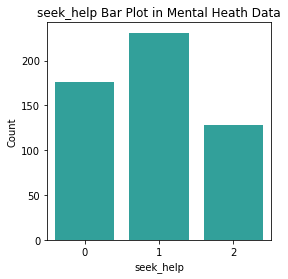

   seek_help  Count  Percent
0          1    231    43.18
2          0    176    32.90
1          2    128    23.93
_________________________________________________________________


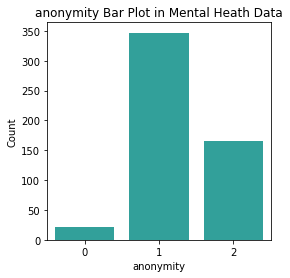

   anonymity  Count  Percent
2          1    347    64.86
1          2    166    31.03
0          0     22     4.11
_________________________________________________________________


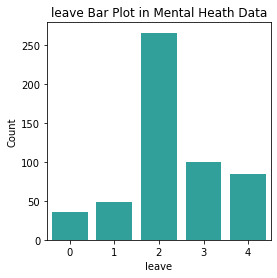

   leave  Count  Percent
2      2    266    49.72
3      3    100    18.69
4      4     84    15.70
1      1     49     9.16
0      0     36     6.73
_________________________________________________________________


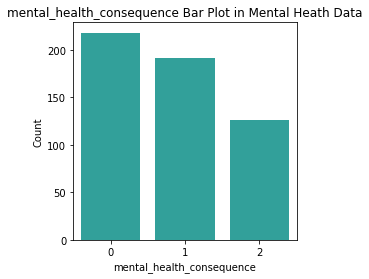

   mental_health_consequence  Count  Percent
0                          0    218    40.75
2                          1    191    35.70
1                          2    126    23.55
_________________________________________________________________


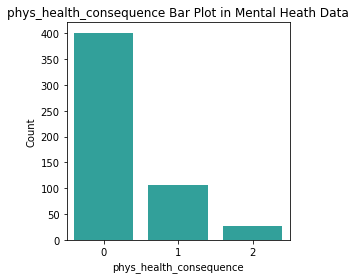

   phys_health_consequence  Count  Percent
0                        0    401    74.95
2                        1    107    20.00
1                        2     27     5.05
_________________________________________________________________


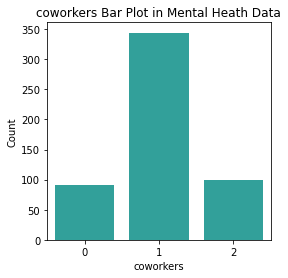

   coworkers  Count  Percent
2          1    344    64.30
0          2    100    18.69
1          0     91    17.01
_________________________________________________________________


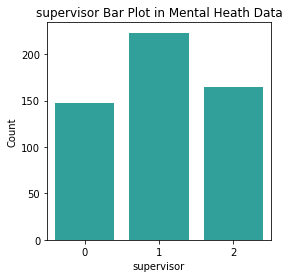

   supervisor  Count  Percent
1           1    223    41.68
0           2    165    30.84
2           0    147    27.48
_________________________________________________________________


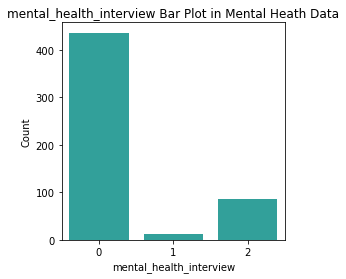

   mental_health_interview  Count  Percent
0                        0    436    81.50
2                        2     87    16.26
1                        1     12     2.24
_________________________________________________________________


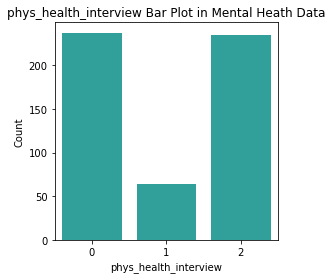

   phys_health_interview  Count  Percent
2                      0    237    44.30
0                      2    234    43.74
1                      1     64    11.96
_________________________________________________________________


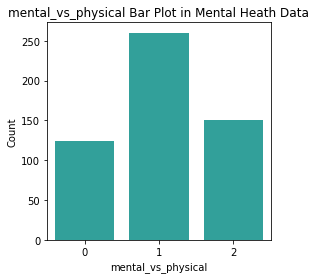

   mental_vs_physical  Count  Percent
2                   1    260    48.60
1                   2    151    28.22
0                   0    124    23.18
_________________________________________________________________


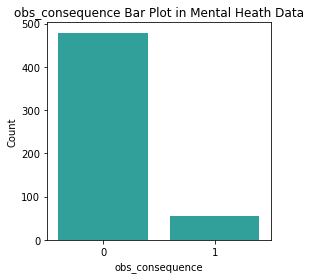

   obs_consequence  Count  Percent
0                0    479    89.53
1                1     56    10.47
_________________________________________________________________


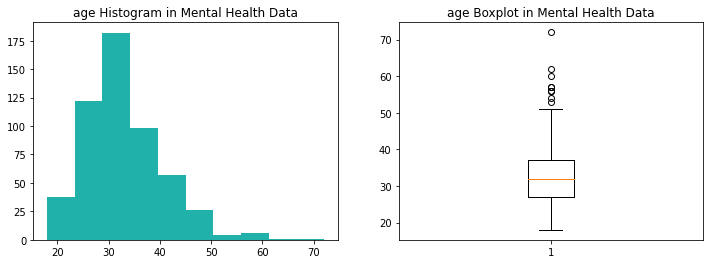

count    535.000000
mean      32.884112
std        7.483417
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       72.000000
Name: age, dtype: float64


In [16]:
explore.explore_univariate(train)

#### Univariate Exploration - Key Findings, Takeaways, and Next Steps:
- `gender` is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- `self_employed` is also very unbalanced, with only 10% self-employed.
- `family_history` is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split and at first glance appears to not be a driver.
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- `anonymity` shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- `coworkers` are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- `supervisor` shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

- `Next Steps` Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

#### Bivariate Exploration

In [17]:
mets = tyler_explore.explore_bivariate(train, 'work_interfere')

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2     mental_health_interview   18.51   0.0001                 2.0
3                care_options   16.16   0.0003                 2.0
4                  supervisor   15.60   0.0004                 2.0
5   mental_health_consequence   15.41   0.0005                 2.0
6                       leave   19.49   0.0006                 4.0
7                    benefits   13.58   0.0011                 2.0
8                      gender   13.21   0.0014                 2.0
9     phys_health_consequence    7.73   0.0209                 2.0
10         mental_vs_physical    7.57   0.0227                 2.0
11           wellness_program    6.70   0.0352                 2.0
12            obs_consequence    4.35   0.0371                 1.0
13               company_size    9.22   0.1005                

In [18]:
tyler_df = encoded_df[['work_interfere', 'leave', 'care_options']]

In [19]:
tyler_dummies = pd.get_dummies(data=tyler_df, columns = ['leave', 'care_options'])

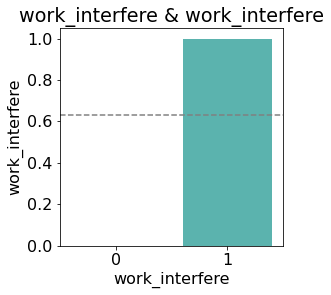


_____________________



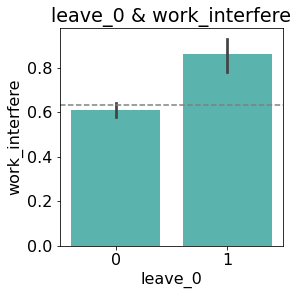


_____________________



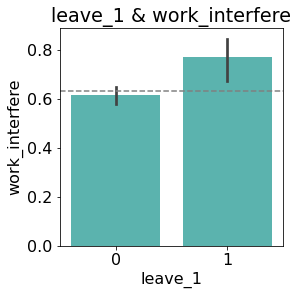


_____________________



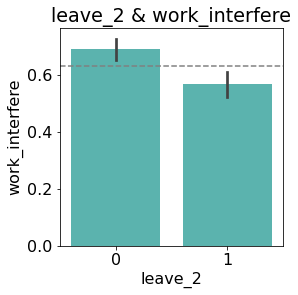


_____________________



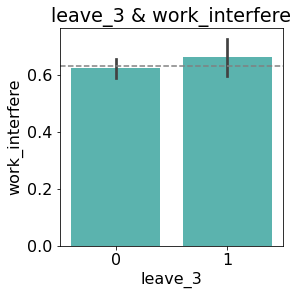


_____________________



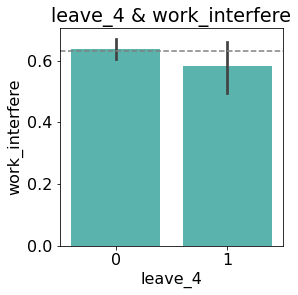


_____________________



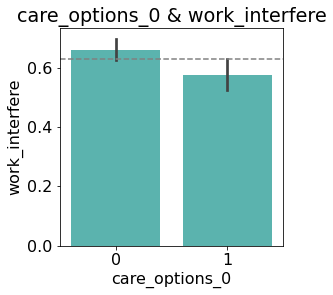


_____________________



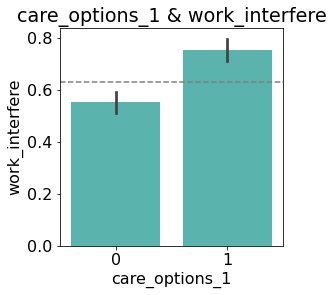


_____________________



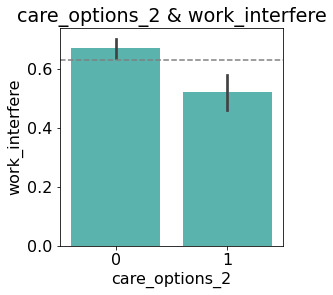


_____________________



KeyError: "['timestamp' 'country'] not found in axis"

In [23]:
tyler_explore.explore_bivariate_2nd(tyler_dummies, 'work_interfere', cat_vars=list(tyler_dummies.columns))

In [18]:
# data frame of categorical variables, with chi2 summary
mets

,variable,chi2,p-value,degrees of freedom
0,family_history,65.94,0.0000,1.0
1,treatment,258.60,0.0000,1.0
2,mental_health_interview,18.51,0.0001,2.0
3,care_options,16.16,0.0003,2.0
4,supervisor,15.60,0.0004,2.0
5,mental_health_consequence,15.41,0.0005,2.0
6,leave,19.49,0.0006,4.0
7,benefits,13.58,0.0011,2.0
8,gender,13.21,0.0014,2.0
9,phys_health_consequence,7.73,0.0209,2.0


In [19]:
# only returning those with 'p-value' < alpha
low_p = mets[mets['p-value']<0.05]
low_p

,variable,chi2,p-value,degrees of freedom
0,family_history,65.94,0.0000,1.0
1,treatment,258.60,0.0000,1.0
2,mental_health_interview,18.51,0.0001,2.0
3,care_options,16.16,0.0003,2.0
4,supervisor,15.60,0.0004,2.0
5,mental_health_consequence,15.41,0.0005,2.0
6,leave,19.49,0.0006,4.0
7,benefits,13.58,0.0011,2.0
8,gender,13.21,0.0014,2.0
9,phys_health_consequence,7.73,0.0209,2.0


In [20]:
# reordering based on chi2 score
top_drivers = low_p.sort_values('chi2', ascending=False)
top_drivers

,variable,chi2,p-value,degrees of freedom
1,treatment,258.60,0.0000,1.0
0,family_history,65.94,0.0000,1.0
6,leave,19.49,0.0006,4.0
2,mental_health_interview,18.51,0.0001,2.0
3,care_options,16.16,0.0003,2.0
4,supervisor,15.60,0.0004,2.0
5,mental_health_consequence,15.41,0.0005,2.0
7,benefits,13.58,0.0011,2.0
8,gender,13.21,0.0014,2.0
9,phys_health_consequence,7.73,0.0209,2.0


In [32]:
# let's look at what needs to be one-hot encoded
variables = list(top_drivers['variable'])
for var in variables:
    print(train[var].value_counts())

1    280
0    255
Name: treatment, dtype: int64
0    306
1    229
Name: family_history, dtype: int64
2    266
3    100
4     84
1     49
0     36
Name: leave, dtype: int64
0    436
2     87
1     12
Name: mental_health_interview, dtype: int64
1    205
0    196
2    134
Name: care_options, dtype: int64
1    223
0    165
2    147
Name: supervisor, dtype: int64
0    218
2    191
1    126
Name: mental_health_consequence, dtype: int64
1    252
2    177
0    106
Name: benefits, dtype: int64
0    408
1    124
2      3
Name: gender, dtype: int64
0    401
2    107
1     27
Name: phys_health_consequence, dtype: int64
2    260
1    151
0    124
Name: mental_vs_physical, dtype: int64
0    320
1    112
2    103
Name: wellness_program, dtype: int64
0    479
1     56
Name: obs_consequence, dtype: int64


#### Bivariate Exploration - Key Findings, Takeaways, and Next Steps:
**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Worth Exploring Further**
- company size

### Looking into Company Size 4:

In [21]:
train4 = train[train['company_size']==4]

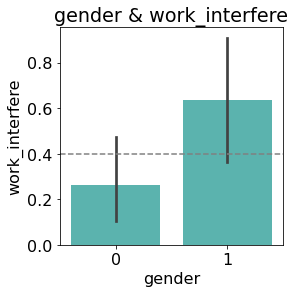


_____________________



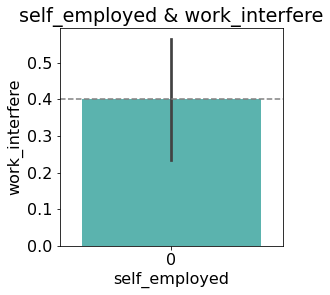


_____________________



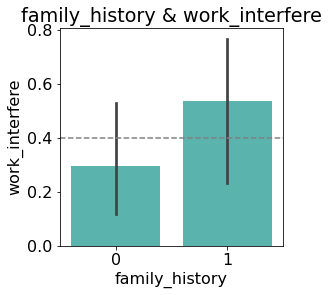


_____________________



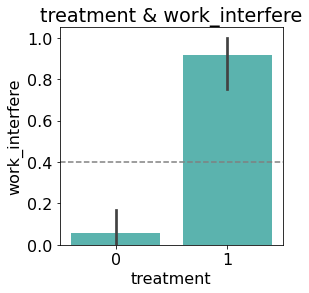


_____________________



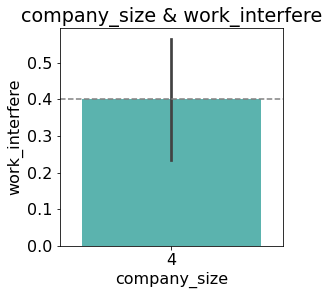


_____________________



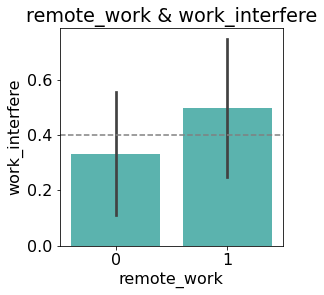


_____________________



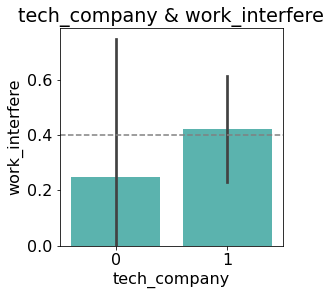


_____________________



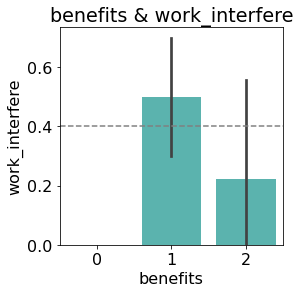


_____________________



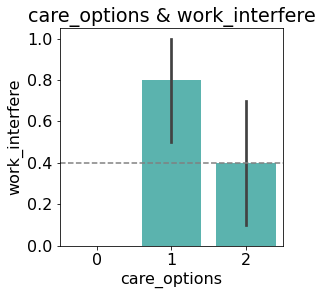


_____________________



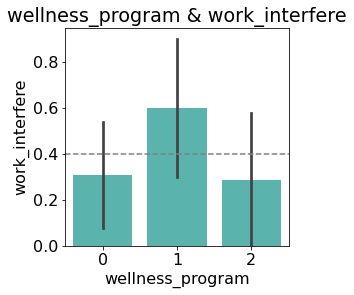


_____________________



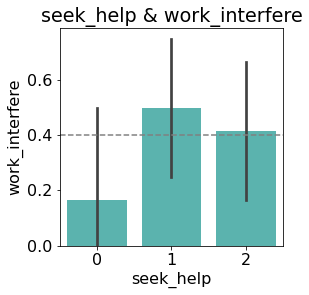


_____________________



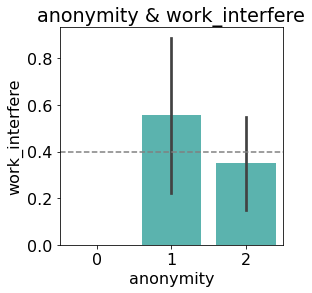


_____________________



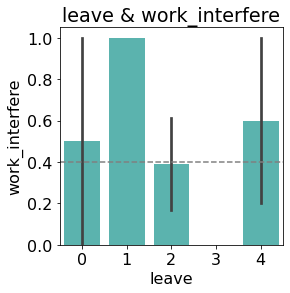


_____________________



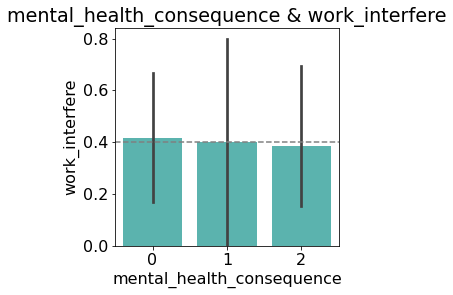


_____________________



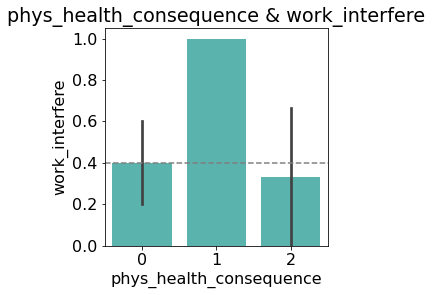


_____________________



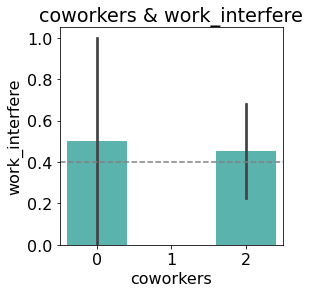


_____________________



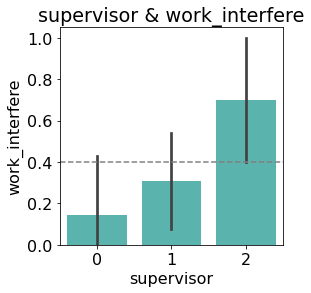


_____________________



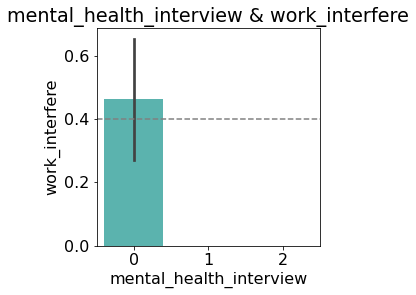


_____________________



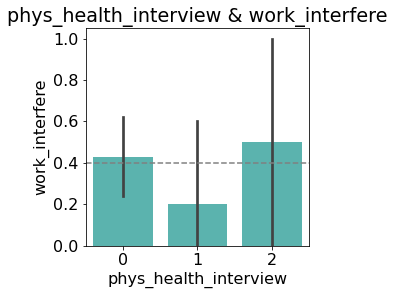


_____________________



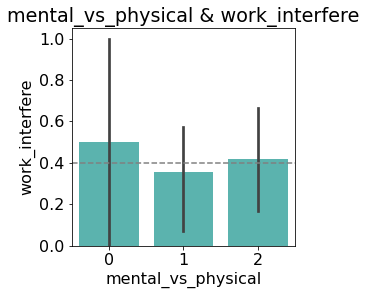


_____________________



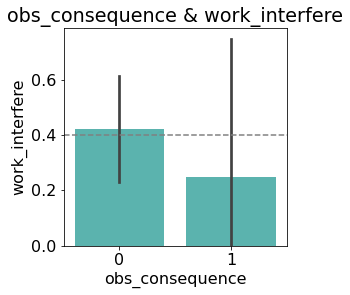


_____________________

age


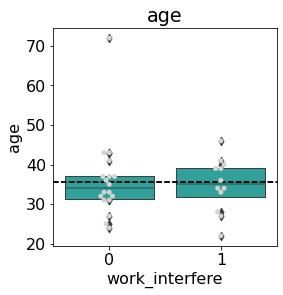

                count       mean        std   min    25%   50%    75%   max
work_interfere                                                             
0                18.0  36.055556  10.485128  24.0  31.25  34.0  37.00  72.0
1                12.0  34.916667   6.761634  22.0  31.75  35.0  39.25  46.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=100.5, pvalue=0.7665715302830782)

____________________

                     variable   chi2  p-value  degrees of freedom
0                   treatment  18.80   0.0000                 1.0
1                care_options  13.33   0.0013                 2.0
2                  supervisor   6.14   0.0464                 2.0
3                      gender   2.64   0.1044                 1.0
4                   coworkers   3.11   0.2116                 2.0
5     mental_health_interview   3.08   0.2147                 2.0
6                    benefits   2.69   0.2612                 2.0
7                       leave   5.09   0.2779              

,variable,chi2,p-value,degrees of freedom
0,treatment,18.80,0.0000,1.0
1,care_options,13.33,0.0013,2.0
2,supervisor,6.14,0.0464,2.0
3,gender,2.64,0.1044,1.0
4,coworkers,3.11,0.2116,2.0
5,mental_health_interview,3.08,0.2147,2.0
6,benefits,2.69,0.2612,2.0
7,leave,5.09,0.2779,4.0
8,wellness_program,2.51,0.2852,2.0
9,family_history,0.96,0.3282,1.0


In [22]:
tyler_explore.explore_bivariate(train4, 'work_interfere')

In [23]:
# list of the potential top drivers
made_the_cut = list(top_drivers['variable'][top_drivers['chi2']>10])

In [24]:
# new dataframe to use for multivariate exploration
to_multi = train[made_the_cut]

In [25]:
# quick peak...
to_multi = to_multi + train['age']